# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec 
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons

### Adding Interactivity

In [3]:
def update_radio(label):
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(data_set[i], bins = int(radio.value_selected), alpha)


SyntaxError: positional argument follows keyword argument (<ipython-input-3-db64ccd4d4cb>, line 4)

### Adding Animation

<IPython.core.display.Javascript object>


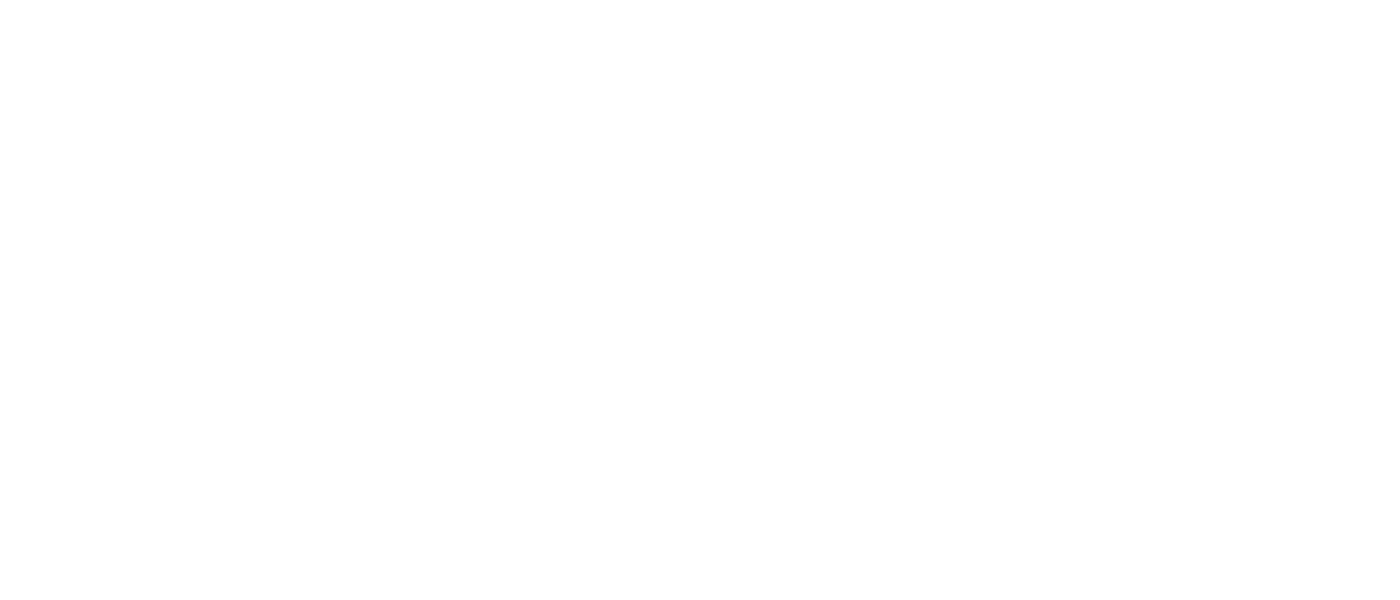

<IPython.core.display.Javascript object>


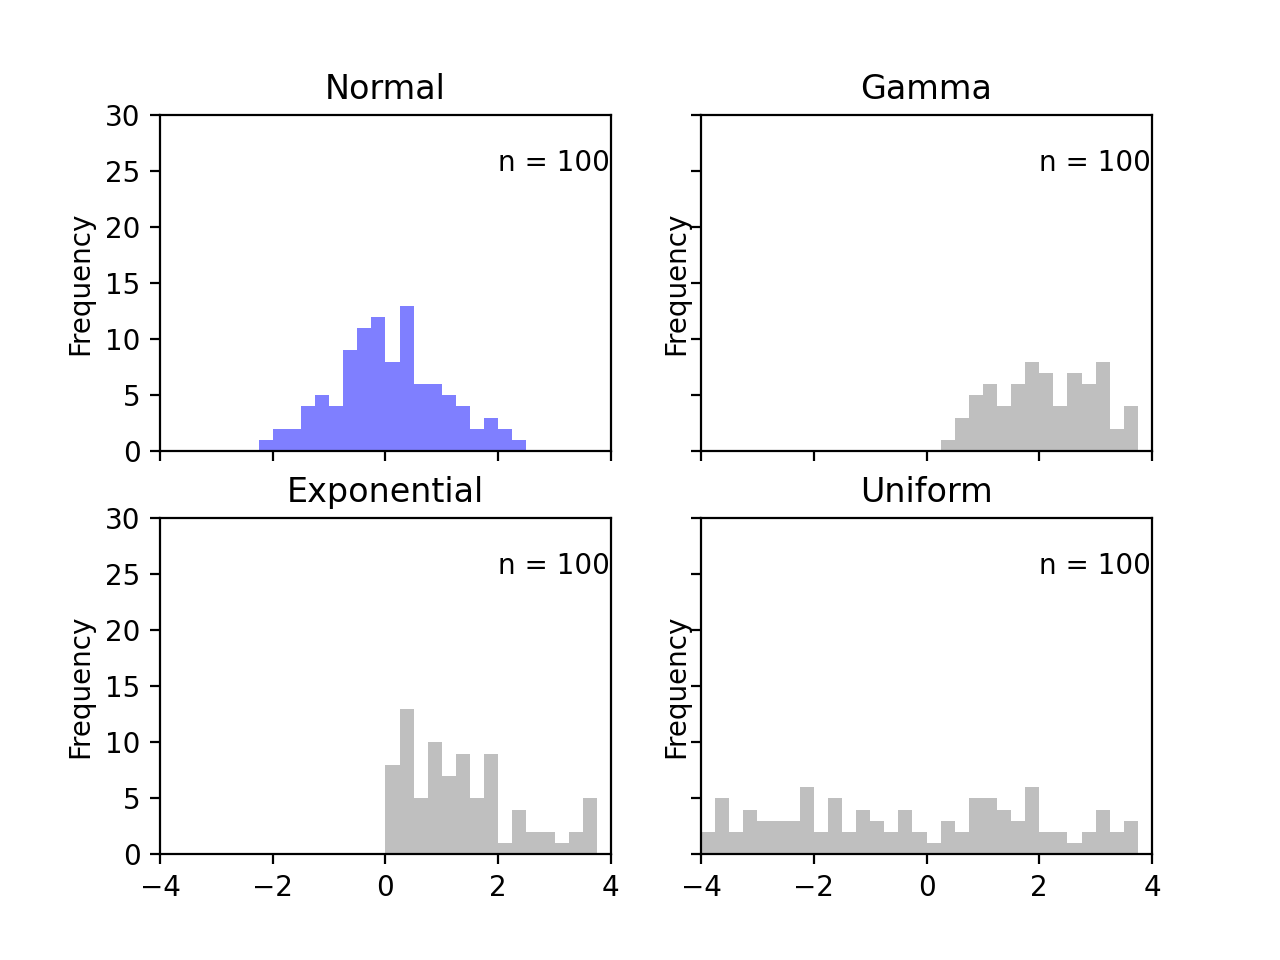

In [5]:
%matplotlib notebook
intervalno = 100

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.gamma(2, 1.5, 1000)
x3 = np.random.exponential(2, 1000)
x4 = np.random.uniform(-4,4, 1000)

data_set = [x1,x2,x3,x4]
colours = ['blue','grey','grey','grey']
datatype = ['Normal','Gamma','Exponential','Uniform']

def update_subplots(curr_frame):
    # Check if animation is at the last frame, if so stop the animation
    if curr_frame == intervalno:
        a.event_source.stop()
    # First clear the current axis
    for idx, ax in enumerate(axs):
        ax.cla() # clear current axis
        bins = np.arange(-4, 4, 0.25)
        ax.axis([-4,4,0,30])  # also you don't want the axis to change, so hard code some values.  
        ax.hist(data_set[idx][:curr_frame], bins = bins, alpha = 0.5, color = colours[idx])
        ax.set_title('{}'.format(datatype[idx]))
        ax.set_ylabel('Frequency')
        ax.annotate('n = {}'.format(curr_frame), [2,25])
        
fig = plt.figure(figsize = (7,3))
fig, ((topleft, topright), (bottomleft, bottomright))= plt.subplots(2,2, sharex = True, sharey = True)
axs = [topleft, topright, bottomleft, bottomright]
a = animation.FuncAnimation(fig, 
                           update_subplots,
                           interval = 100)         

###  Example Radio Button code from Github

<IPython.core.display.Javascript object>


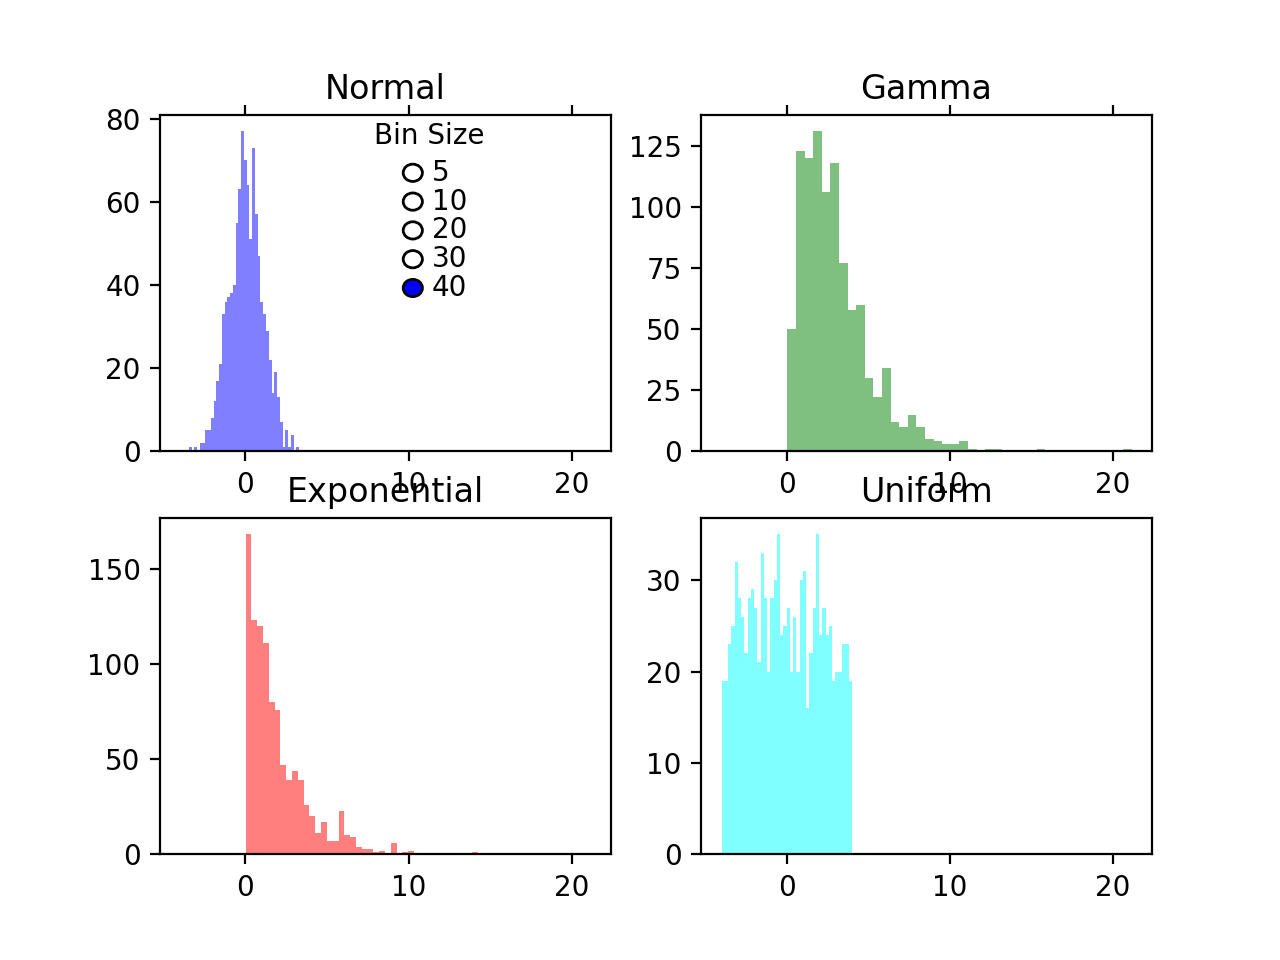

0

In [91]:

from matplotlib.widgets import RadioButtons, Slider

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.gamma(2, 1.5, 1000)
x3 = np.random.exponential(2, 1000)
x4 = np.random.uniform(-4,4, 1000)

# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

type_distri = ['Normal', 'Gamma', 'Exponential', 'Uniform']
data_set = [x1, x2, x3, x4]
my_color = ['blue', 'green', 'red', 'cyan']

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for idx, ax in enumerate(axs):
    ax.hist(data_set[idx], bins=5, alpha=0.5, color=my_color[idx])
    ax.set_title('{}'.format(type_distri[idx]))

plt.xlim(-10, 25)

# define radio button and text
rax = plt.axes([0.3, .67, .15, .18], frameon=False)
radio = RadioButtons(rax, (5, 10, 20, 30, 40))
plt.text(-.05, 1.0, 'Bin Size', fontsize=10)

# update function
def update_radio(label):
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(data_set[i], bins=int(radio.value_selected), alpha=0.5, color=my_color[i])
        axs[i].set_title('{}'.format(type_distri[i]))
        if i in [0,1]:
            axs[i].tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    
radio.on_clicked(update_radio)

<IPython.core.display.Javascript object>


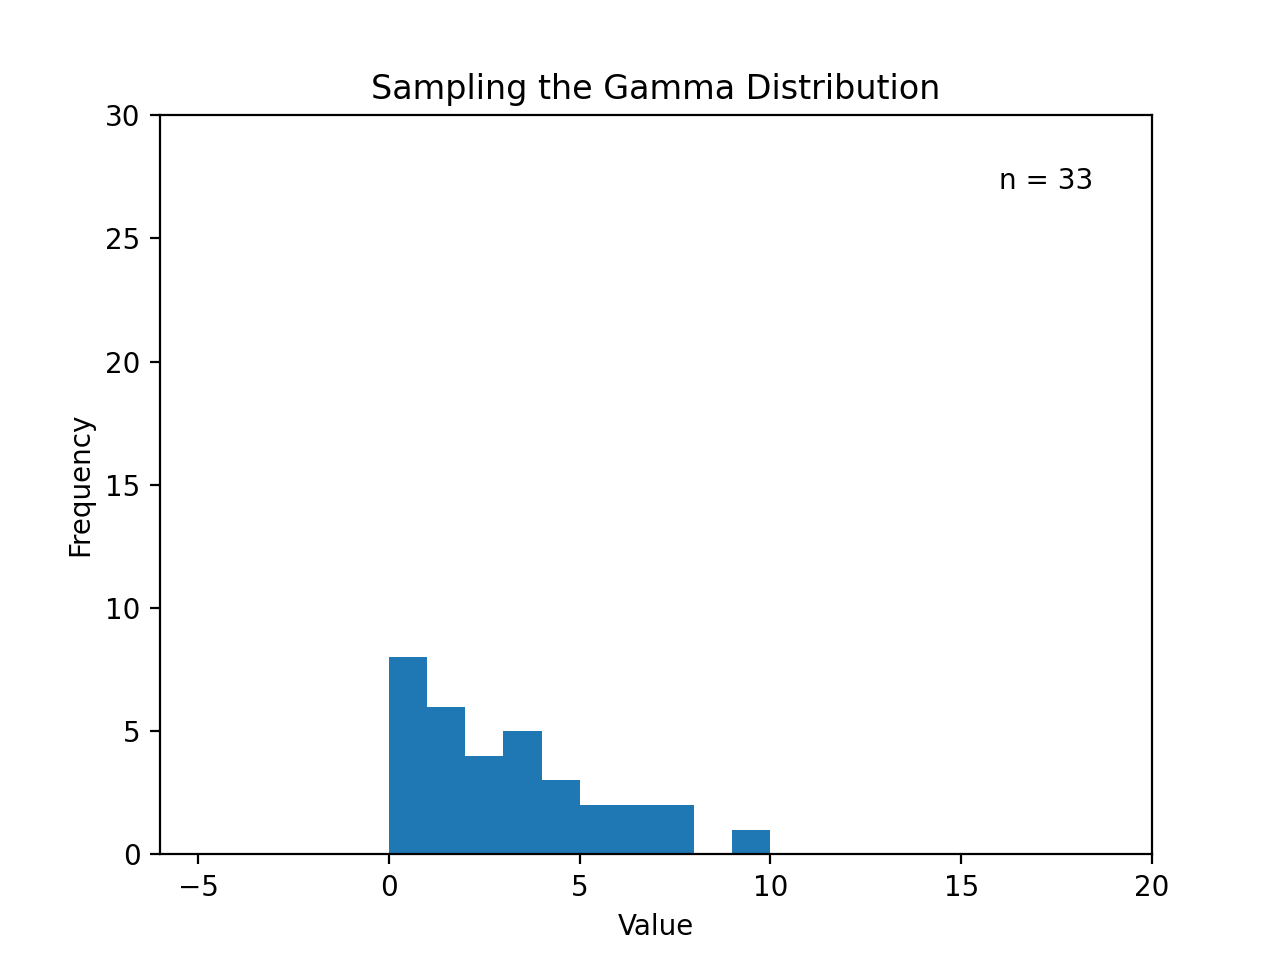

In [57]:
# create the function that will do the plotting, where curr is the current frame
def update_single(curr, dataset, type_of_distri):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr >= n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-6, 20, 1)
    plt.hist(dataset[:curr], bins=bins)
    plt.axis([-6,20,0,30])
    plt.gca().set_title('Sampling the {} Distribution'.format(type_of_distri))
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [16,27])
    
fig = plt.figure()
n=np.random.randint(100, 1000, )
type_distri = ['Normal', 'Gamma', 'Exponential', 'Uniform']
data_set = [x1, x2, x3, x4]

a = animation.FuncAnimation(fig, 
                            update_single, 
                            fargs=[data_set[1], datatype[1]], 
                            interval=100)

### Past Code attempts

Used gridspec, but i couldn't find a way to constrain my axes. 
In addition, not the most efficient use of code.Not sure how to createthe animate function here. 

In [ ]:
%matplotlib notebook

fig = plt.figure(figsize = (7,3))
# Create a 2 by 2 plot of 4 diagrams
gs = gridspec.GridSpec(2,2)
print(gs)
#Create names for each of the plots
topleft = plt.subplot(gs[0,0])
topright = plt.subplot(gs[0,1])
bottomleft = plt.subplot(gs[1,0])
bottomright = plt.subplot(gs[1,1])
    
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, 1000)
x2 = np.random.gamma(2, 1.5, 1000)
x3 = np.random.exponential(2, 1000)
x4 = np.random.uniform(-4,4, 1000)
# Plot the histograms using gridspec
#a = animation.FuncAnimation(fig, plotx1, interval = 200)
topleft.hist(    x1, density=True,  color = 'grey', bins=50, alpha=0.5)
topright.hist(   x2, density=True,  color = 'grey', bins=50, alpha=0.5)
bottomleft.hist( x3, density=True,  color = 'blue', bins=50, alpha=0.3)
bottomright.hist(x4, density=True,  color = 'grey', bins=50, alpha=0.5)
plt.show()

### Starter Code

<IPython.core.display.Javascript object>


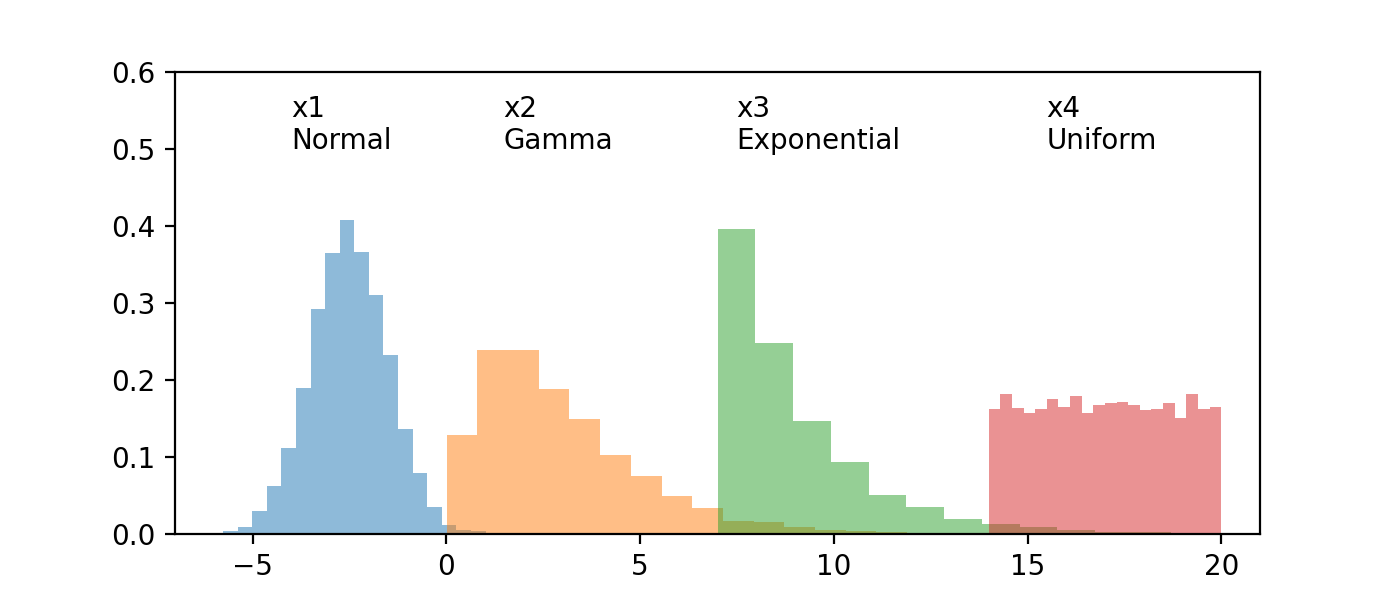

Text(15.491840930874858, 0.5, 'x4\nUniform')

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(7,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

### Lecture Code

<IPython.core.display.Javascript object>


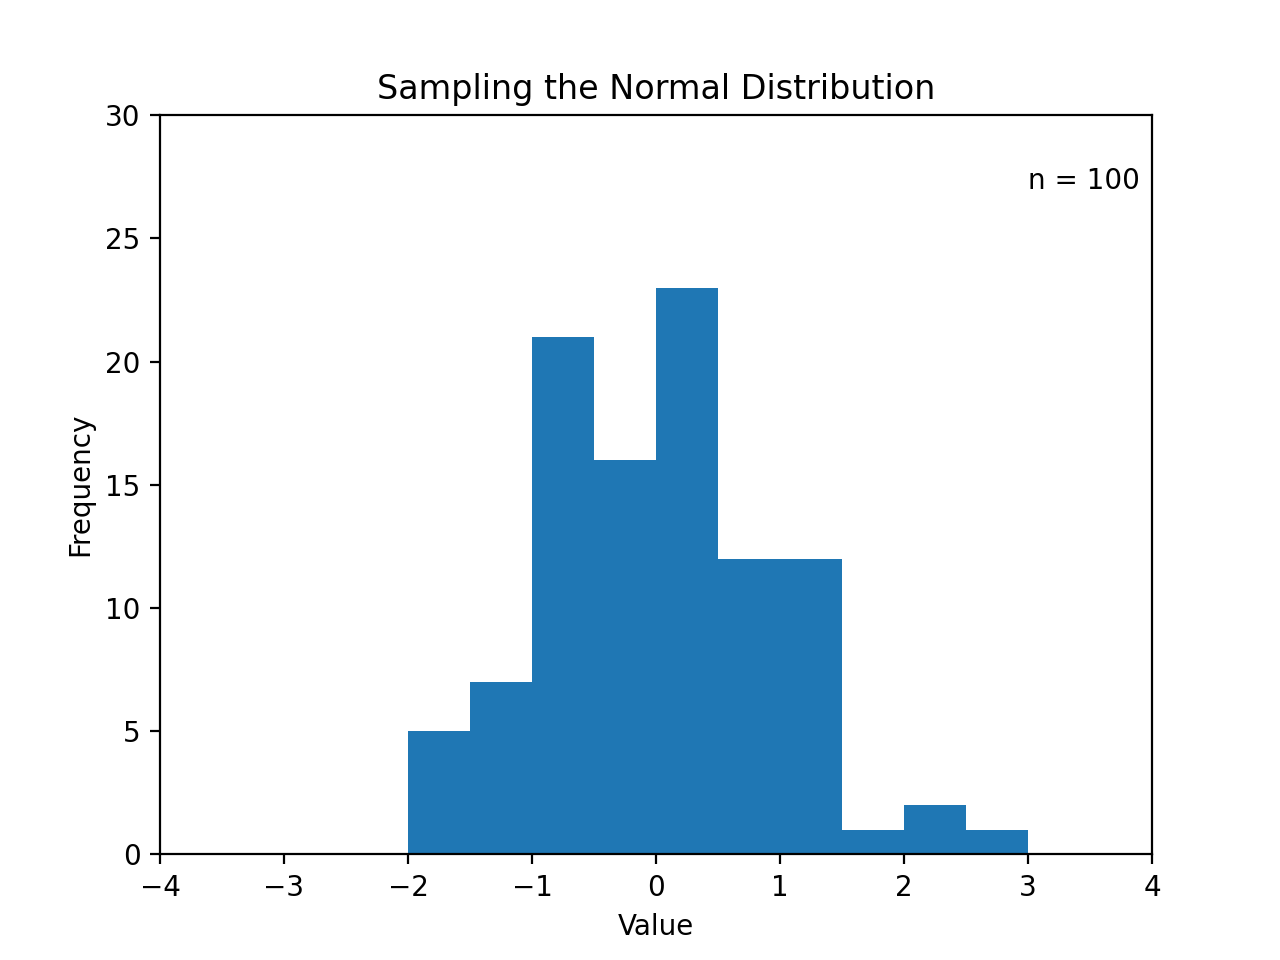

In [28]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)
x
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla() #clear current axis
    bins = np.arange(-4, 4, 0.5) # last parameter is the spacing between bins. This will ensure that the bins won't change.
    plt.hist(x[:curr], bins=bins)  
    plt.axis([-4,4,0,30])  # also you don't want the axis to change, so hard code some values.  
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

fig = plt.figure()
a = animation.FuncAnimation(fig, # figure
                            update, # function reference
                            interval=100) # time in milliseconds     